In [40]:
import pandas as pd
df=pd.read_csv("WineQT.csv")
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,1
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,2
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,3
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,4


In [41]:
df.shape

(1143, 13)

In [42]:
df.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality', 'Id'],
      dtype='object')

In [43]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
fixed acidity,1143.0,8.311111,1.747595,4.60000,7.10000,7.90000,9.100000,15.90000
volatile acidity,1143.0,0.531339,0.179633,0.12000,0.39250,0.52000,0.640000,1.58000
citric acid,1143.0,0.268364,0.196686,0.00000,0.09000,0.25000,0.420000,1.00000
residual sugar,1143.0,2.532152,1.355917,0.90000,1.90000,2.20000,2.600000,15.50000
chlorides,1143.0,0.086933,0.047267,0.01200,0.07000,0.07900,0.090000,0.61100
free sulfur dioxide,1143.0,15.615486,10.250486,1.00000,7.00000,13.00000,21.000000,68.00000
total sulfur dioxide,1143.0,45.914698,32.782130,6.00000,21.00000,37.00000,61.000000,289.00000
density,1143.0,0.996730,0.001925,0.99007,0.99557,0.99668,0.997845,1.00369
pH,1143.0,3.311015,0.156664,2.74000,3.20500,3.31000,3.400000,4.01000
sulphates,1143.0,0.657708,0.170399,0.33000,0.55000,0.62000,0.730000,2.00000


In [44]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1143 entries, 0 to 1142
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1143 non-null   float64
 1   volatile acidity      1143 non-null   float64
 2   citric acid           1143 non-null   float64
 3   residual sugar        1143 non-null   float64
 4   chlorides             1143 non-null   float64
 5   free sulfur dioxide   1143 non-null   float64
 6   total sulfur dioxide  1143 non-null   float64
 7   density               1143 non-null   float64
 8   pH                    1143 non-null   float64
 9   sulphates             1143 non-null   float64
 10  alcohol               1143 non-null   float64
 11  quality               1143 non-null   int64  
 12  Id                    1143 non-null   int64  
dtypes: float64(11), int64(2)
memory usage: 116.2 KB


In [45]:
df.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
Id                      0
dtype: int64

In [46]:
#checking the quality column
df['quality'].value_counts().sort_index()


quality
3      6
4     33
5    483
6    462
7    143
8     16
Name: count, dtype: int64

In [47]:
df['quality_label'] = df['quality'].apply(
    lambda x: 1 if x > 5 else 0
)

df['quality_label'].value_counts()


quality_label
1    621
0    522
Name: count, dtype: int64

In [48]:
df = df.drop(columns=['quality'])


In [49]:
drop_cols = [
    "fixed acidity",
    "citric acid",
    "free sulfur dioxide",
    "residual sugar",
    "chlorides",
    "Id",
    
]

df = df.drop(columns=drop_cols)


In [50]:
df.head()

,volatile acidity,total sulfur dioxide,density,pH,sulphates,alcohol,quality_label
0,0.70,34.0,0.9978,3.51,0.56,9.4,0
1,0.88,67.0,0.9968,3.20,0.68,9.8,0
2,0.76,54.0,0.9970,3.26,0.65,9.8,0
3,0.28,60.0,0.9980,3.16,0.58,9.8,1
4,0.70,34.0,0.9978,3.51,0.56,9.4,0


In [51]:
X = df.drop(columns=['quality_label'])
y = df['quality_label']


In [52]:
y.value_counts()



quality_label
1    621
0    522
Name: count, dtype: int64

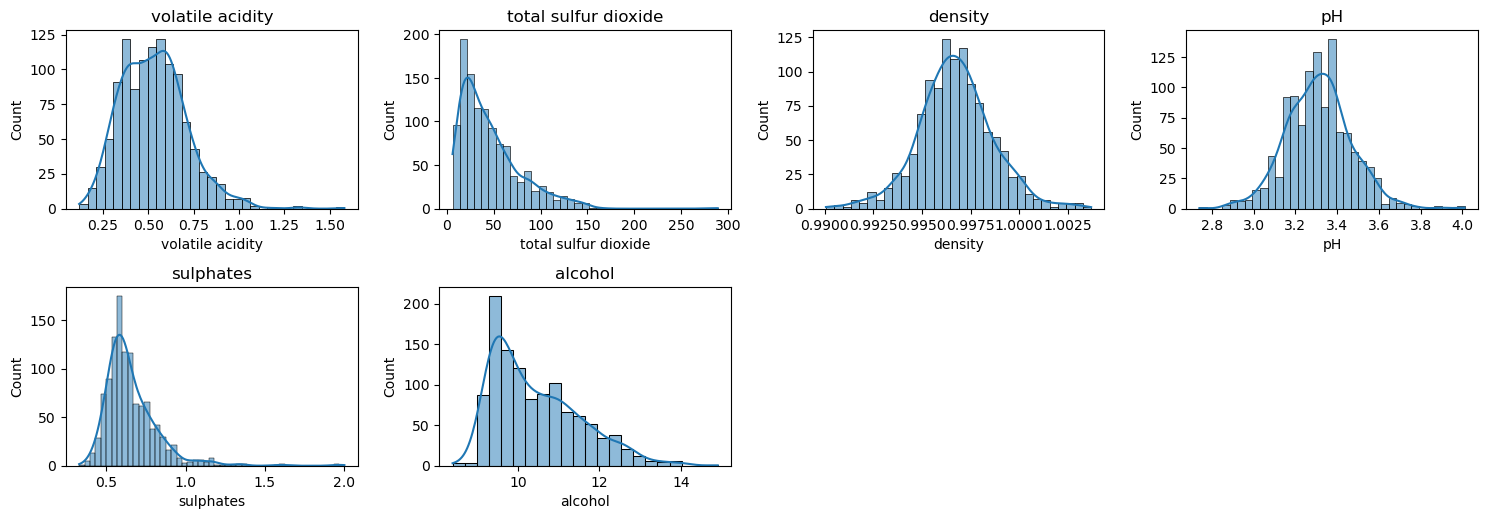

In [53]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(15,10))
for i, col in enumerate(X.columns, 1):
    plt.subplot(4,4,i)
    sns.histplot(X[col], kde=True)
    plt.title(col)

plt.tight_layout()
plt.show()


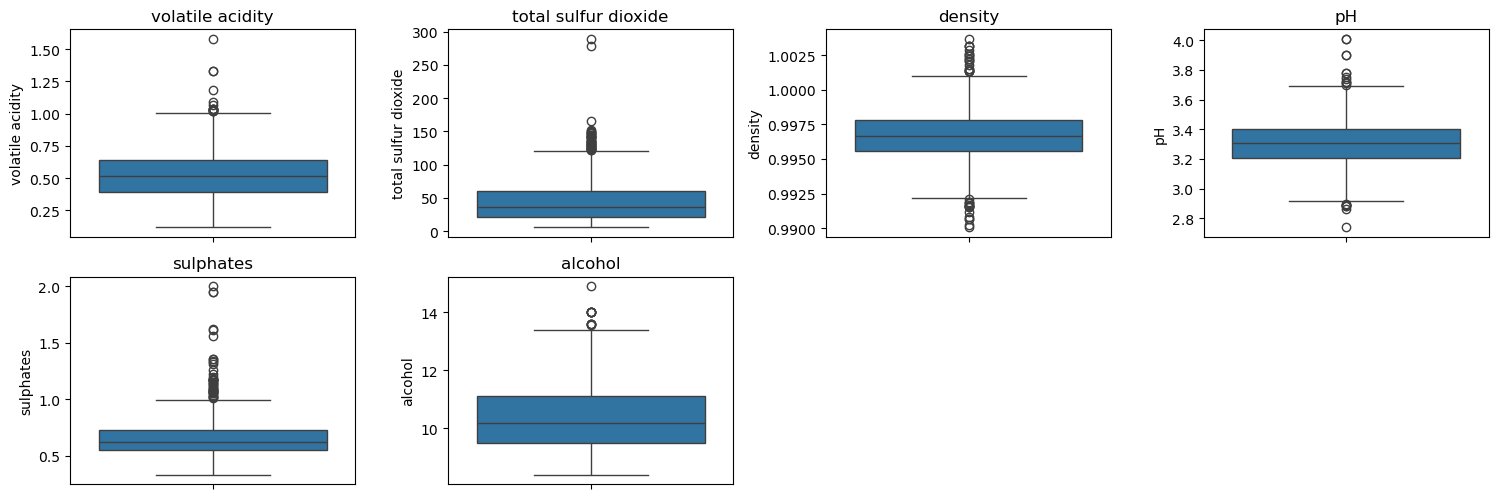

In [54]:
plt.figure(figsize=(15,10))
for i, col in enumerate(X.columns, 1):
    plt.subplot(4,4,i)
    sns.boxplot(y=X[col])
    plt.title(col)

plt.tight_layout()
plt.show()


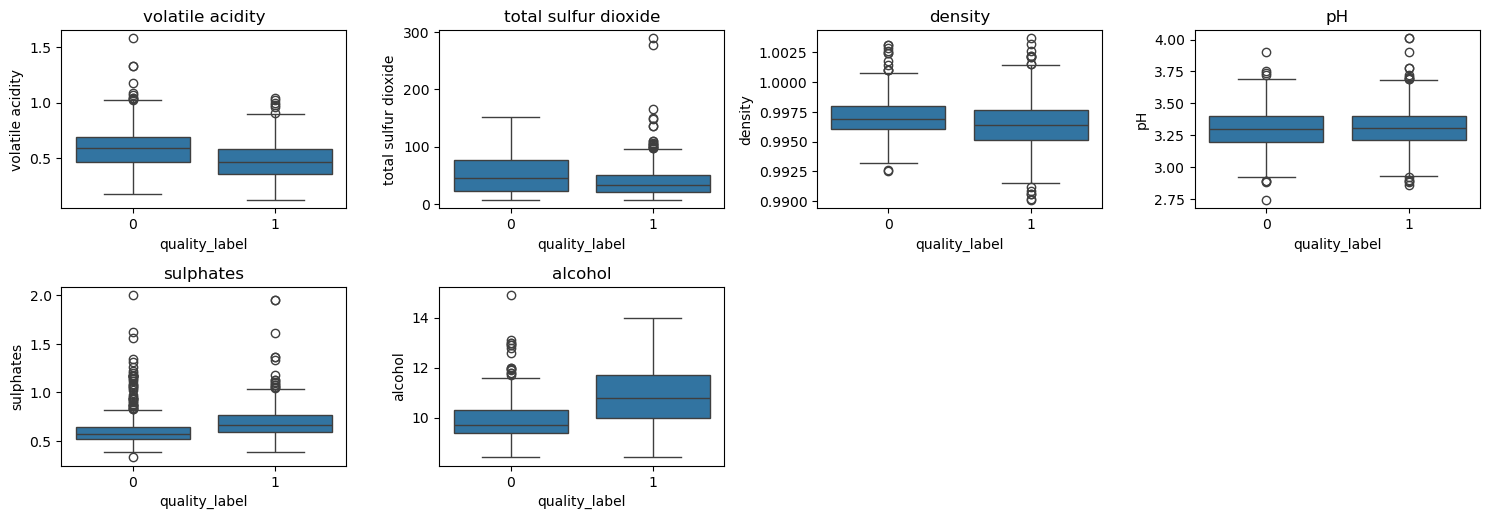

In [55]:
plt.figure(figsize=(15,10))
for i, col in enumerate(X.columns, 1):
    plt.subplot(4,4,i)
    sns.boxplot(x=y, y=X[col])
    plt.title(col)

plt.tight_layout()
plt.show()


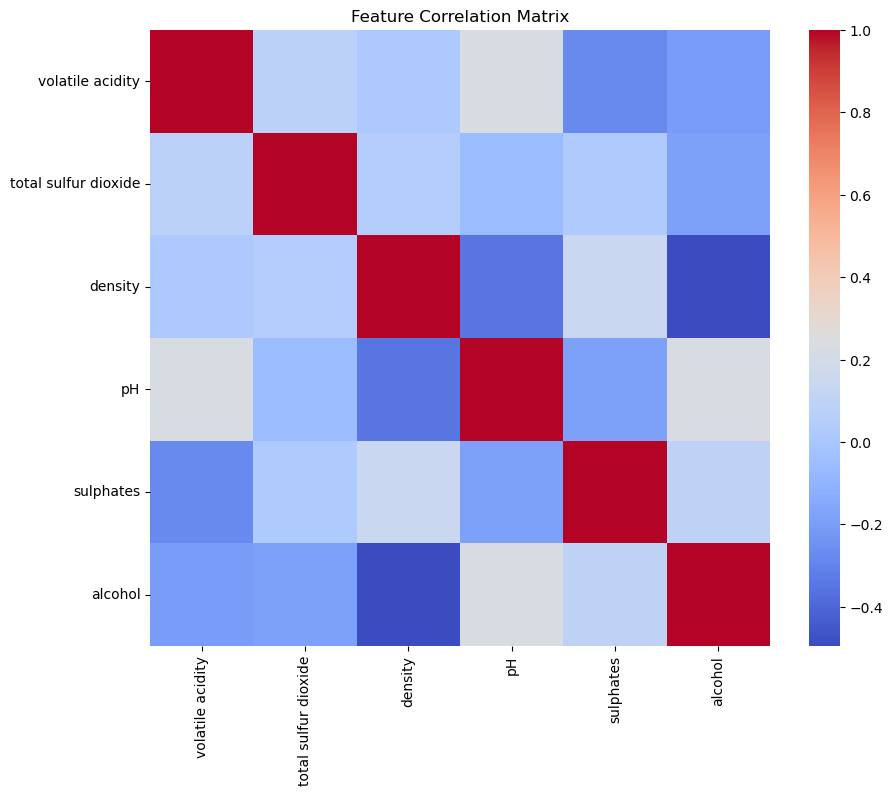

In [56]:
plt.figure(figsize=(10,8))
sns.heatmap(X.corr(), cmap='coolwarm', annot=False)
plt.title("Feature Correlation Matrix")
plt.show()


In [57]:
X_capped = X.copy()

for col in X.columns:
    Q1 = X[col].quantile(0.25)
    Q3 = X[col].quantile(0.75)
    IQR = Q3 - Q1

    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR

    X_capped[col] = X[col].clip(lower, upper)


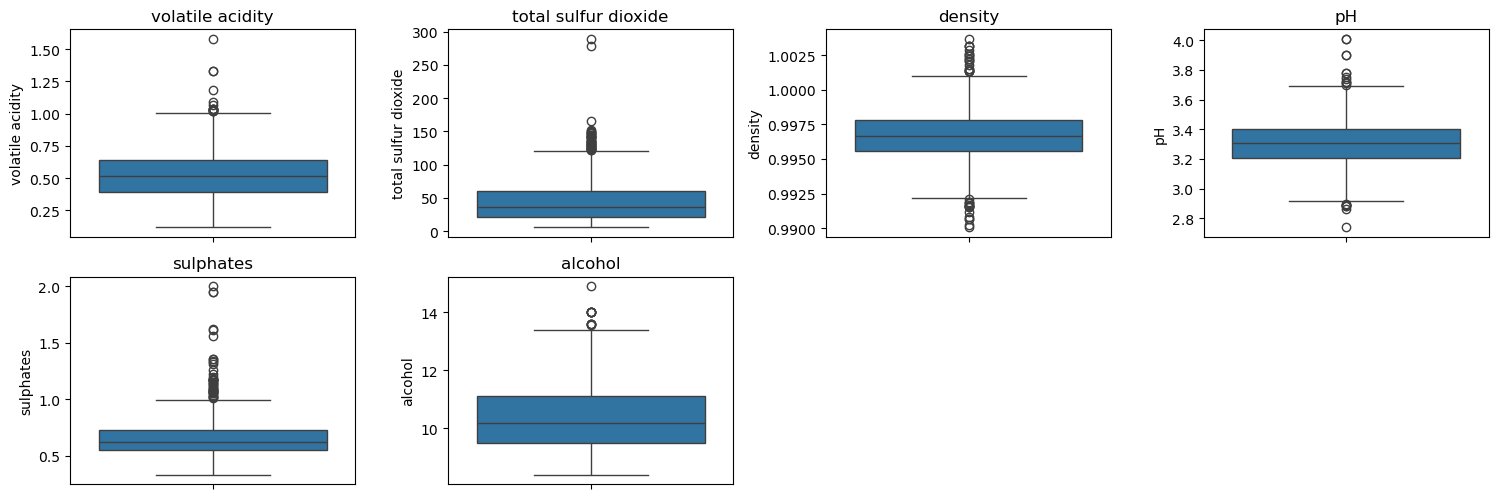

In [58]:
plt.figure(figsize=(15,10))
for i, col in enumerate(X_capped.columns, 1):
    plt.subplot(4,4,i)
    sns.boxplot(y=X[col])
    plt.title(col)

plt.tight_layout()
plt.show()

In [59]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42,
    stratify=y
)


In [60]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [61]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report


In [62]:
log_reg = LogisticRegression(max_iter=1000)
log_reg.fit(X_train_scaled, y_train)


,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,1000
,multi_class,'deprecated'


In [63]:
y_pred_lr = log_reg.predict(X_test_scaled)


In [64]:
print("Logistic Regression Accuracy:",
      accuracy_score(y_test, y_pred_lr))

print(confusion_matrix(y_test, y_pred_lr))
print(classification_report(y_test, y_pred_lr))


Logistic Regression Accuracy: 0.777292576419214
[[82 23]
 [28 96]]
              precision    recall  f1-score   support

           0       0.75      0.78      0.76       105
           1       0.81      0.77      0.79       124

    accuracy                           0.78       229
   macro avg       0.78      0.78      0.78       229
weighted avg       0.78      0.78      0.78       229



In [65]:
dt = DecisionTreeClassifier(
    random_state=42,
    max_depth=5
)
dt.fit(X_train, y_train)


,criterion,'gini'
,splitter,'best'
,max_depth,5
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,42
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


In [66]:
y_pred_dt = dt.predict(X_test)


In [67]:
print("Decision Tree Accuracy:",
      accuracy_score(y_test, y_pred_dt))

print(confusion_matrix(y_test, y_pred_dt))
print(classification_report(y_test, y_pred_dt))


Decision Tree Accuracy: 0.7554585152838428
[[78 27]
 [29 95]]
              precision    recall  f1-score   support

           0       0.73      0.74      0.74       105
           1       0.78      0.77      0.77       124

    accuracy                           0.76       229
   macro avg       0.75      0.75      0.75       229
weighted avg       0.76      0.76      0.76       229



In [68]:
rf = RandomForestClassifier(
    n_estimators=200,
    random_state=42
)
rf.fit(X_train, y_train)


,n_estimators,200
,criterion,'gini'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [69]:
y_pred_rf = rf.predict(X_test)


In [70]:
print("Random Forest Accuracy:",
      accuracy_score(y_test, y_pred_rf))

print(confusion_matrix(y_test, y_pred_rf))
print(classification_report(y_test, y_pred_rf))


Random Forest Accuracy: 0.7947598253275109
[[ 77  28]
 [ 19 105]]
              precision    recall  f1-score   support

           0       0.80      0.73      0.77       105
           1       0.79      0.85      0.82       124

    accuracy                           0.79       229
   macro avg       0.80      0.79      0.79       229
weighted avg       0.80      0.79      0.79       229



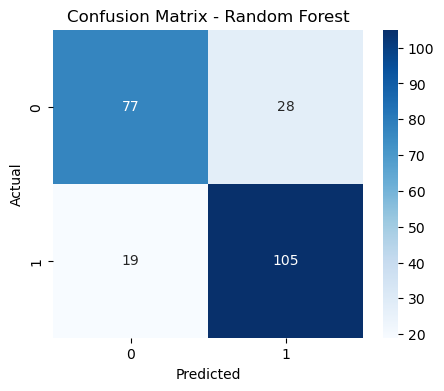

In [71]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test, y_pred_rf)

plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - Random Forest")
plt.show()


In [72]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred_rf))


              precision    recall  f1-score   support

           0       0.80      0.73      0.77       105
           1       0.79      0.85      0.82       124

    accuracy                           0.79       229
   macro avg       0.80      0.79      0.79       229
weighted avg       0.80      0.79      0.79       229



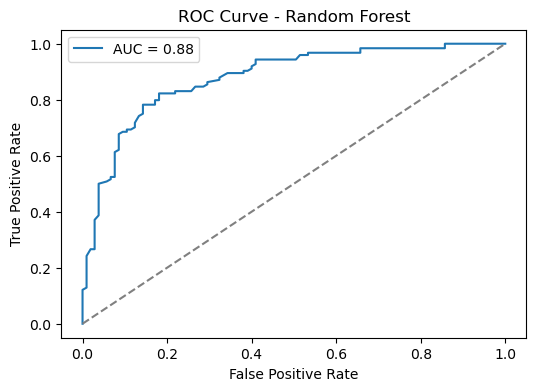

In [73]:
from sklearn.metrics import roc_curve, roc_auc_score

y_prob = rf.predict_proba(X_test)[:, 1]

fpr, tpr, _ = roc_curve(y_test, y_prob)
auc_score = roc_auc_score(y_test, y_prob)

plt.figure(figsize=(6,4))
plt.plot(fpr, tpr, label=f"AUC = {auc_score:.2f}")
plt.plot([0,1], [0,1], linestyle='--', color='gray')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve - Random Forest")
plt.legend()
plt.show()


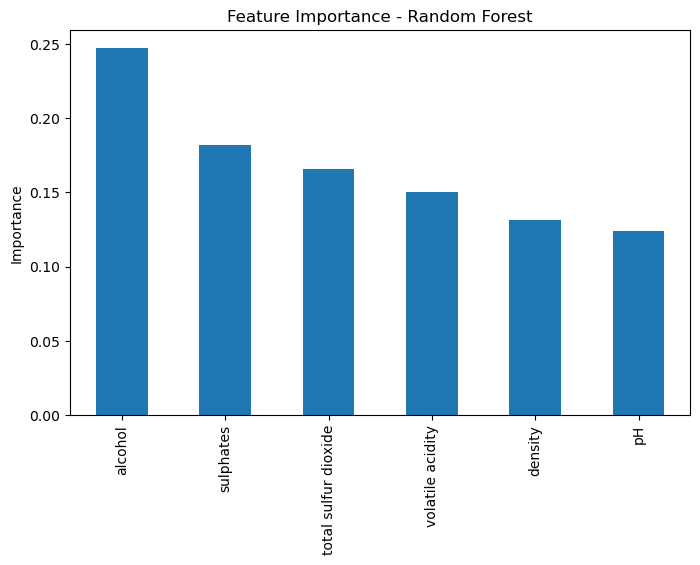

In [74]:
import pandas as pd

feature_importance = pd.Series(
    rf.feature_importances_,
    index=X.columns
).sort_values(ascending=False)

plt.figure(figsize=(8,5))
feature_importance.plot(kind='bar')
plt.title("Feature Importance - Random Forest")
plt.ylabel("Importance")
plt.show()


In [75]:
from sklearn.model_selection import GridSearchCV


In [76]:
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 5, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}


In [77]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(random_state=42)

grid_search = GridSearchCV(
    estimator=rf,
    param_grid=param_grid,
    cv=5,
    scoring='roc_auc',
    n_jobs=-1,
    verbose=2
)


In [78]:
grid_search.fit(X_train, y_train)


Fitting 5 folds for each of 108 candidates, totalling 540 fits


,estimator,RandomForestC...ndom_state=42)
,param_grid,"{'max_depth': [None, 5, ...], 'min_samples_leaf': [1, 2, ...], 'min_samples_split': [2, 5, ...], 'n_estimators': [100, 200, ...]}"
,scoring,'roc_auc'
,n_jobs,-1
,refit,True
,cv,5
,verbose,2
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,n_estimators,300


In [79]:
grid_search.best_params_


{'max_depth': 10,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 300}

In [80]:
best_rf = grid_search.best_estimator_

y_pred_best = best_rf.predict(X_test)


In [81]:
from sklearn.metrics import accuracy_score, classification_report

print("Tuned Random Forest Accuracy:",
      accuracy_score(y_test, y_pred_best))

print(classification_report(y_test, y_pred_best))


Tuned Random Forest Accuracy: 0.7947598253275109
              precision    recall  f1-score   support

           0       0.80      0.74      0.77       105
           1       0.79      0.84      0.82       124

    accuracy                           0.79       229
   macro avg       0.79      0.79      0.79       229
weighted avg       0.79      0.79      0.79       229



In [82]:
joblib.dump(rf, "wine_model.pkl")
joblib.dump(scaler, "scaler.pkl")
joblib.dump(X.columns.tolist(), "features.pkl")
joblib.dump(X.mean().to_dict(), "feature_means.pkl")

print("✅ Model trained and saved with ONLY selected features")
print("Features used:", X.columns.tolist())

✅ Model trained and saved with ONLY selected features
Features used: ['volatile acidity', 'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol']


In [83]:
import pandas as pd
import joblib
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier

# ---------------------------------
# Load dataset
# ---------------------------------
df = pd.read_csv("WineQT.csv")

# ---------------------------------
# Create target FIRST
# ---------------------------------
df["quality_label"] = df["quality"].apply(lambda x: 1 if x > 5 else 0)

# ---------------------------------
# Drop unwanted columns (EXACT)
# ---------------------------------
drop_cols = [
    "fixed acidity",
    "citric acid",
    "free sulfur dioxide",
    "residual sugar",
    "chlorides",
    "Id",
    "quality"
]

df = df.drop(columns=drop_cols)

# ---------------------------------
# Split features & target
# ---------------------------------
X = df.drop(columns=["quality_label"])
y = df["quality_label"]

# ---------------------------------
# Train-test split
# ---------------------------------
X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.2,
    random_state=42,
    stratify=y
)

# ---------------------------------
# Scaling
# ---------------------------------
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# ---------------------------------
# Train model (THIS IS CRITICAL)
# ---------------------------------
rf = RandomForestClassifier(
    n_estimators=200,
    max_depth=10,
    min_samples_split=5,
    min_samples_leaf=2,
    random_state=42
)

rf.fit(X_train_scaled, y_train)   # 🔥 MODEL IS FITTED HERE

# ---------------------------------
# Save everything for Streamlit
# ---------------------------------
joblib.dump(rf, "wine_model.pkl")
joblib.dump(scaler, "scaler.pkl")
joblib.dump(X.columns.tolist(), "features.pkl")
joblib.dump(X.mean().to_dict(), "feature_means.pkl")

print("✅ Model fitted and saved correctly")
print("Features used:", X.columns.tolist())


✅ Model fitted and saved correctly
Features used: ['volatile acidity', 'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol']
